In [1]:
!pip install six

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
data = pd.read_csv("titanic1.csv")
data.head()

data.dropna(inplace=True)
data.replace({"male":0, "female":1}, inplace=True)

In [3]:
feature_cols = ['Sex', 'Age', 'Fare', 'Pclass']
x = data[feature_cols]
y = data.Survived


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [5]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [6]:
feature_cols_new = X_train.columns.values.tolist()

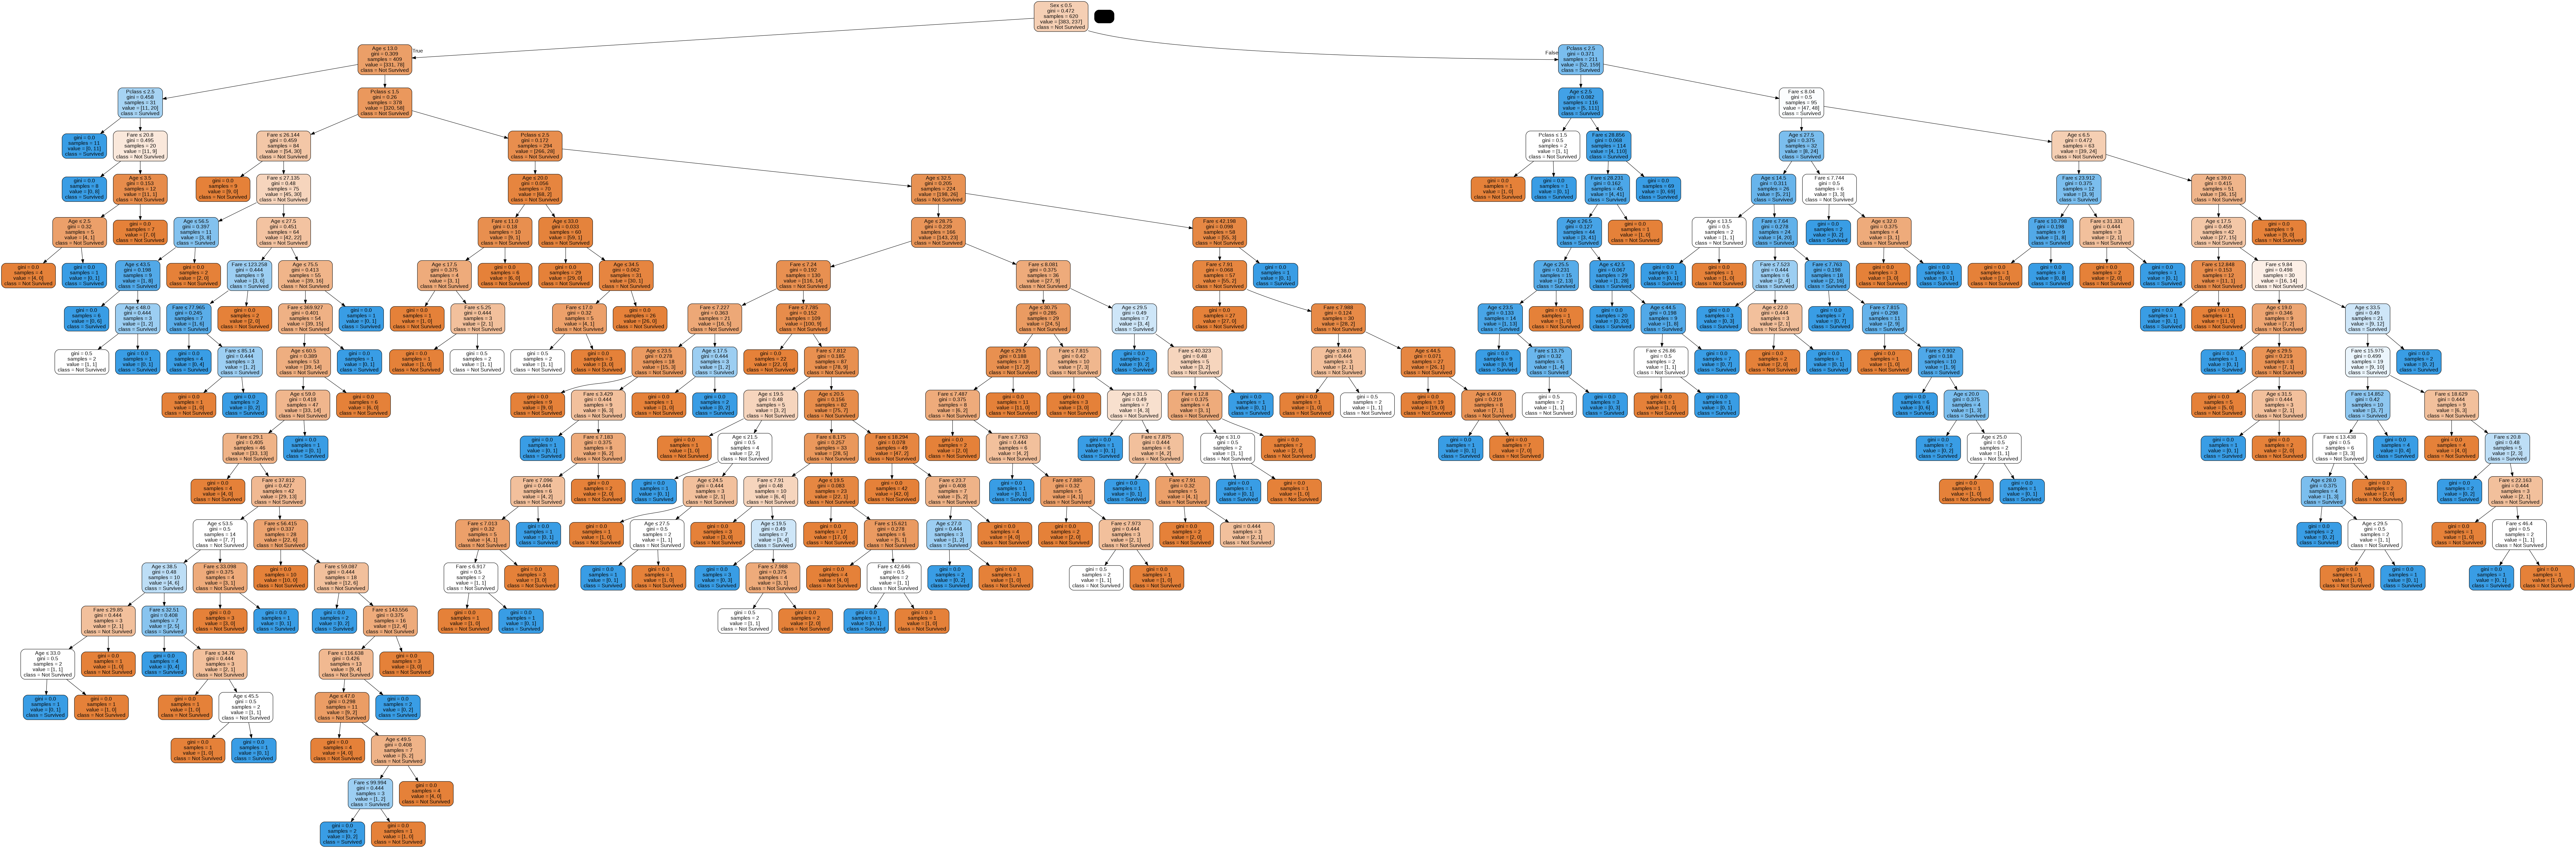

In [7]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols_new,class_names=['Not Survived','Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
pd.crosstab(y_test, y_pred)


Accuracy: 0.7640449438202247


col_0,0,1
Survived,,
0,126,36
1,27,78
